In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [5]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


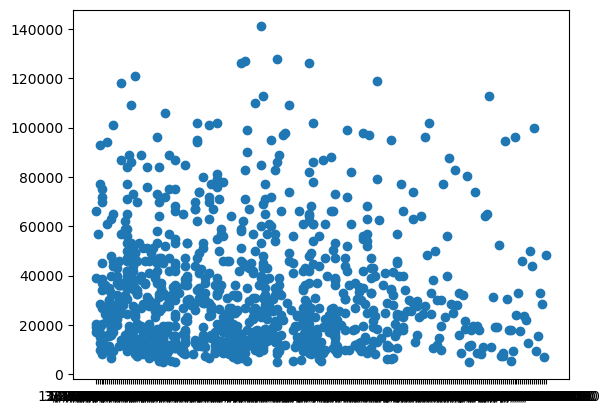

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [10]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [11]:
df= pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=['saledate'])

In [12]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

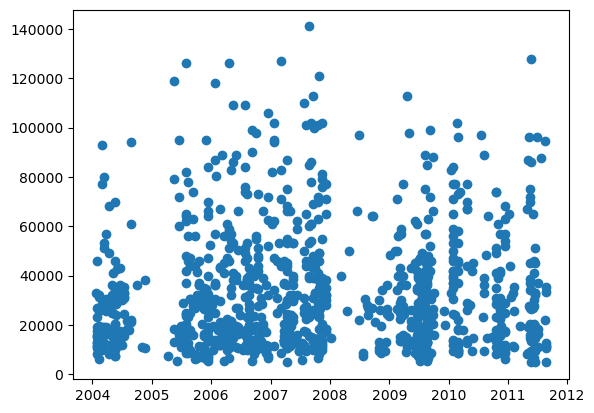

In [13]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

### Sort Data

In [16]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df["saledate"][:1000]

205615   1989-01-17
92531    1989-01-31
62665    1989-01-31
142669   1989-01-31
88803    1989-01-31
            ...    
118779   1989-03-16
140778   1989-03-16
69337    1989-03-16
97998    1989-03-16
143206   1989-03-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [17]:
df_tmp = df.copy()

###Funciton  for saledate modification 

In [78]:
def parameter_saledate(data):
    data["saleYear"]= data.saledate.dt.year
    data["saleMonth"]= data.saledate.dt.month
    data["saleDay"]= data.saledate.dt.day
    data["saleDayOfWeek"]=data.saledate.dt.dayofweek
    data["saleDayofYear"]= data.saledate.dt.dayofyear
    
    
    return data    

In [20]:
parameter_saledate(df_tmp)
df_tmp.head().T

,205615,92531,62665,142669,88803
SalesID,1646770,1403696,1328950,1508793,1394449
SalePrice,9500.0,23500.0,19000.0,28000.0,39000.0
MachineID,1126363,888616,1444418,1255973,1212304
ModelID,8434,7110,4089,4138,7001
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1983,1973,1982
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [21]:
df_tmp.drop("saledate", axis = 1 , inplace = True)

In [22]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

##MODELLING

In [24]:
from sklearn.ensemble import RandomForestRegressor

X= df_tmp.drop("SalePrice", axis = 1)
y = df_tmp["SalePrice"]
model = RandomForestRegressor()
model.fit(X,y)


ValueError: could not convert string to float: 'Medium'

###Function to convert String to categories

In [28]:
def string_cat(data):
    for label, content in data.items():
        if pd.api.types.is_string_dtype(content):
            data[label]= content.astype("category").cat.as_ordered()

In [29]:
string_cat(df_tmp)

In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 411423
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [31]:
df_tmp.to_csv("data/bluebook-for-bulldozers/Train_tmp.csv", index= False)

In [32]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayofYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
92531,1403696,23500.0,888616,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
62665,1328950,19000.0,1444418,4089,132,99.0,1983,NaN,NaN,D3B,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
142669,1508793,28000.0,1255973,4138,132,99.0,1973,NaN,NaN,D7F,...,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN,1989,1,31,1,31
88803,1394449,39000.0,1212304,7001,132,99.0,1982,NaN,NaN,215,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


#Filling missing values

In [33]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [34]:
def empty_median(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                data[label +"_is_missing"]= pd.isnull(content)
                data[label]= content.fillna(content.median())

In [35]:
empty_median(df_tmp)

In [36]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [37]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [38]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

##Turning categorical variables into numbers

In [39]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


###Turning categories into numbers and filling them missning value


In [40]:
def cat_number(data):
    for label, content in data.items():
        if not pd.api.types.is_numeric_dtype(content):
            data[label+"_is_missing"]= pd.isnull(content)
            data[label]= pd.Categorical(content).codes+1

In [41]:
cat_number(df_tmp)

In [42]:
df_tmp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [44]:
##all data numeric and now its time to model


from sklearn.ensemble import RandomForestRegressor

X= df_tmp.drop("SalePrice", axis = 1)
y = df_tmp["SalePrice"]
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X,y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [45]:
###Splitting Data

df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear !=2012]
len(df_train), len(df_val)

(401125, 11573)

In [48]:
X_train, y_train = df_train.drop("SalePrice", axis =1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis =1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [49]:
model.score(X_valid, y_valid)

0.9869567343006624

#Buiding Evaluation Funciton

In [60]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle (y_test, y_preds): 
    
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


def show_scores(model):
    train_preds= model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE":mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training R^2":r2_score(y_train, train_preds),
              "Valid r^2": r2_score(y_valid, val_preds),
              "Training RMSLE":rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              }
    return scores

In [54]:
model = RandomForestRegressor(n_jobs=-1,  random_state=42)

In [55]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [56]:
shbow_scores(model)

{'Training MAE': 1579.9225042318478,
 'Valid MAE': 6115.076774388663,
 'Training R^2': 0.9875094338128393,
 'Valid r^2': 0.8726005402477234,
 'Training RMSLE': 0.08445810857070804,
 'Valid RMSLE': 0.25549511856528256}

In [57]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    "n_estimators": np.arange(10,100,10),
    "max_depth": [None, 3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "max_features":[0.5,1,"sqrt","auto"],
    "max_samples":[10000]
}

rs_model= RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose= True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [58]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [61]:
show_scores(rs_model)

{'Training MAE': 9298.056341699375,
 'Valid MAE': 10728.2826332055,
 'Training R^2': 0.6552981813317096,
 'Valid r^2': 0.6711117039848,
 'Training RMSLE': 0.4047094266055422,
 'Valid RMSLE': 0.42651908098041785}

#Best Hyperparameters 
Found after 100iterarions

In [64]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [65]:
show_scores(ideal_model)

{'Training MAE': 2954.455238860603,
 'Valid MAE': 5944.150572154919,
 'Training R^2': 0.9589161184198043,
 'Valid r^2': 0.8819696205261401,
 'Training RMSLE': 0.14474444719312074,
 'Valid RMSLE': 0.24557702232219408}

In [93]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [67]:
parameter_saledate(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayofYear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298


#Preprocessing Data

In [92]:
def preprocesss_data(df):
    parameter_saledate(df)
    empty_median(df)
    
    cat_number(df)
    return df

In [94]:
preprocesss_data(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,126,713,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,126,186,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,126,325,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,126,325,...,False,False,False,False,False,True,True,True,True,True


In [72]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True


In [84]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
- saledate_is_missing


In [95]:
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [96]:
df_test["auctioneerID_is_missing"]= False

In [97]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,False,False,False,True,True,False


In [77]:
set(df_test.columns)-set(X_train.columns)

{'saledate', 'saledate_is_missing'}

In [98]:
df_test.drop("saledate", axis =1, inplace=True)
df_test.drop("saledate_is_missing", axis =1, inplace = True)

In [86]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [100]:
df_test = df_test.reindex(columns=list(X_train.columns))

In [101]:
test_preds = ideal_model.predict(df_test)

In [102]:
test_preds

array([17265.795645  , 17305.81380006, 51286.17302475, ...,
       14692.2934504 , 20128.20284769, 27542.74293447])

In [103]:
df_preds = pd.DataFrame()
df_preds["SalesID"]= df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17265.795645
1,1227844,17305.813800
2,1227847,51286.173025
3,1227848,69121.525721
4,1227863,58729.087744
...,...,...
12452,6643171,47532.083159
12453,6643173,15023.843105
12454,6643184,14692.293450
12455,6643186,20128.202848


In [104]:
df_preds.to_csv("data/bluebook-for-bulldozers/test_prediction.csv", index=False)

#Feature Importance

In [105]:
ideal_model.feature_importances_

array([3.59879666e-02, 1.99395153e-02, 4.56246796e-02, 1.68126478e-03,
       3.29622625e-03, 2.00844447e-01, 3.06781199e-03, 9.75590203e-04,
       5.06224754e-02, 4.16500025e-02, 6.12465276e-02, 4.87543733e-03,
       1.35155826e-02, 1.55522365e-01, 4.61461923e-02, 5.95506047e-03,
       1.77286152e-03, 2.28844324e-03, 3.75063131e-03, 6.25986350e-02,
       4.51672648e-04, 5.01225427e-05, 8.75473202e-04, 1.92302357e-04,
       1.23120970e-03, 4.03998662e-04, 2.00463260e-03, 6.02609172e-03,
       3.20626627e-03, 7.42513464e-05, 4.79998395e-03, 2.48087407e-03,
       3.07895718e-03, 2.57464644e-04, 3.56149539e-04, 5.54088228e-03,
       9.64243198e-04, 1.21236414e-02, 1.85919554e-03, 1.61039078e-03,
       8.50149715e-04, 1.02339741e-03, 1.94942476e-03, 5.53532962e-04,
       3.72969889e-04, 3.64185213e-04, 2.95231365e-04, 2.08368777e-03,
       7.92585512e-04, 2.21844932e-04, 2.74987721e-04, 7.21017048e-02,
       3.87112461e-03, 5.73208146e-03, 2.92845870e-03, 9.81973609e-03,
      

In [111]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances":importances})
          .sort_values("feature_importances", ascending= False)
          .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importnace")
    ax.invert_yaxis()


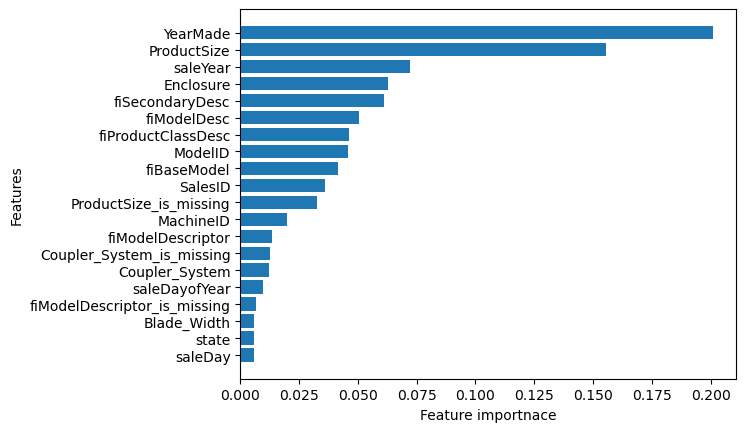

In [112]:
plot_features(X_train.columns, ideal_model.feature_importances_)